<a href="https://colab.research.google.com/github/tarabelo/GrIA-QML-2025-26/blob/main/03.%20Bits%20y%20C%C3%BAbits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Instalamos qiskit en el notebook
!pip install qiskit[visualization] qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 131.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 141.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 90.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 4.1 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=b1e43d3f9831f8864ebf25fde2ad95f2b4ddab312c7afa9c5b2b40c7c2911489
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [2]:
import qiskit
import qiskit_aer
print('Qiskit version ',qiskit.__version__)
print('Aer simulator version ', qiskit_aer.__version__)

Qiskit version  2.3.0
Aer simulator version  0.17.2


#**Bits y Cúbits**

Contenidos

1. [Bits y puertas clásicas](#clasico)
    - [Bits clásicos como vectores](#bits)
    - [Puertas clásicas como matrices](#clasicas)
    - [Computación reversible](#reversible)
2. [Bits cuánticos o cúbits](#cubits)
3. [Medida del estado](#medida)
3. [Observables, valor esperado y matrices de Pauli](#observables)
4. [Errores, matrices de densidad y estados mezcla](#errores)

<a name="clasico"></a>
# **Bits y puertas clásicas**

Comenzaremos viendo cómo se pueden expresar operaciones sobre bits clásicos como operaciones de matrices y vectores. De esta forma, podemos ver los bits cuánticos como una generalización de los clásicos.

También veremos el concempo de computación reversible, imprescindible en computación cuántica.

<a name="bits"></a>
## Bits clásicos como vectores

Podemos expresar 1 bit clásico como un vector de tamaño 2:

 $$
|b\rangle = \begin{bmatrix}p_0 \\p_1 \end{bmatrix}
$$

con $p_i \in \{0,1\}$ y $p_0+p_1 = 1$.

Así:

$$
|0\rangle = \begin{bmatrix}1 \\0 \end{bmatrix}\qquad |1\rangle = \begin{bmatrix}0 \\1 \end{bmatrix}
$$

## Múltiples bits

Un número de 2 bits $|ab\rangle$, con $a,b\in\{0,1\}$ se puede expresar como el producto tensor de los bits individuales:

$$
|ab\rangle = |a\rangle\otimes |b\rangle = \begin{bmatrix}a_{0} \\ a_{1}\end{bmatrix}\otimes \begin{bmatrix}b_{0} \\ b_1\end{bmatrix} = \begin{bmatrix} a_{0}b_0\\ a_0b_1 \\ a_1b_0 \\ a_1b_1\end{bmatrix} = \begin{bmatrix} p_{0}\\ p_1 \\ p_2 \\ p_{3}\end{bmatrix}
$$

con $p_i \in \{0,1\}$. Es fácil verificar que se sigue manteniendo: $p_0+p_1+p_2+p_3 = 1$.

----------------------------

**Ejemplo:**


$$
|00\rangle = |0\rangle\otimes |0\rangle = \begin{bmatrix}1 \\ 0\end{bmatrix}\otimes \begin{bmatrix}1 \\ 0\end{bmatrix} = \begin{bmatrix}1 \\ 0 \\ 0 \\ 0\end{bmatrix}\\
|01\rangle = |0\rangle\otimes |1\rangle  = \begin{bmatrix}1 \\ 0\end{bmatrix}\otimes \begin{bmatrix}0 \\ 1\end{bmatrix} = \begin{bmatrix}0 \\ 1 \\ 0 \\ 0\end{bmatrix}\\
|10\rangle = |1\rangle\otimes |0\rangle  = \begin{bmatrix}0 \\ 1\end{bmatrix}\otimes \begin{bmatrix}1 \\ 0\end{bmatrix} = \begin{bmatrix}0 \\ 0 \\ 1 \\ 0\end{bmatrix}\\
|11\rangle = |1\rangle\otimes |1\rangle = \begin{bmatrix}0 \\ 1\end{bmatrix}\otimes \begin{bmatrix}0 \\ 1\end{bmatrix} = \begin{bmatrix}0 \\ 0 \\ 0 \\ 1\end{bmatrix}\\
$$

----------------------------

Podemos escribir por tanto:

$$
|ab\rangle = \begin{bmatrix} p_{0}\\ p_1 \\ p_2 \\ p_{3}\end{bmatrix} = p_0|00\rangle + p_1|01\rangle + p_2 |10\rangle + p_3|11\rangle
$$

En general, vamos a poder escribir un número de $n$ bits como:
$$
|B\rangle = p_0|00\ldots00\rangle +p_1|00\ldots01\rangle + p_2|00\ldots10\rangle +\cdots + p_{2^n-1} |11\ldots11\rangle= \sum_{i=0}^{2^{n}-1}p_i |i\rangle
$$

con $p_i \in \{0,1\}$ y $\sum_{i=0}^{n-1}p_i = 1$, siendo $p_i$ la probabilidad de que el número sea $i$.

<a name="clasicas"></a>
## Puertas clásicas como matrices

Podemos representar las puertas lógicas clásicas como matrices u operadores, tales que aplicados a un número binario obtienen un número binario.

Por ejemplo:

$$
\begin{aligned}
\text{NOT} &= \begin{bmatrix}0 & 1\\ 1 & 0\end{bmatrix}\\[10pt]
\text{AND} &= \begin{bmatrix}1 & 1 & 1 & 0\\ 0 & 0 & 0 & 1\end{bmatrix}\\[10pt]
\text{OR} &= \begin{bmatrix}1 & 0 & 0 & 0\\ 0 & 1 & 1 & 1\end{bmatrix}\\[10pt]
\end{aligned}
$$

Ejemplos:

$$
\begin{aligned}
\text{NOT}|0\rangle &= \begin{bmatrix}0 & 1\\ 1 & 0\end{bmatrix}
\begin{bmatrix} 1\\ 0\end{bmatrix} = \begin{bmatrix} 0\\ 1\end{bmatrix} = |1\rangle
\\[10pt]
\text{AND}|11\rangle &= \begin{bmatrix}1 & 1 & 1 & 0\\ 0 & 0 & 0 & 1\end{bmatrix}
\begin{bmatrix} 0\\ 0\\0\\1\end{bmatrix} = \begin{bmatrix}0\\1\end{bmatrix} = |1\rangle \\[10pt]
\text{AND}|01\rangle &= \begin{bmatrix}1 & 1 & 1 & 0\\ 1 & 0 & 0 & 1\end{bmatrix}
\begin{bmatrix} 0\\ 1\\0\\0\end{bmatrix} = \begin{bmatrix} 1\\ 0\end{bmatrix} = |0\rangle \\[10pt]
\text{OR}|10\rangle &= \begin{bmatrix}1 & 0 & 0 & 0\\ 0 & 1 & 1 & 1\end{bmatrix}
\begin{bmatrix} 0\\ 0\\1\\0\end{bmatrix} = \begin{bmatrix} 0\\1\end{bmatrix} = |1\rangle \\[10pt]
\text{OR}|11\rangle &= \begin{bmatrix}1 & 0 & 0 & 0\\ 0 & 1 & 1 & 1\end{bmatrix}
\begin{bmatrix} 0\\ 0\\0\\1\end{bmatrix} = \begin{bmatrix} 0\\1\end{bmatrix} = |1\rangle\\[10pt]
\end{aligned}
$$

Podemos obtener la representación de un conjunto de puertas mediante operaciones de matrices. Por ejemplo:

<center><img src="https://drive.google.com/uc?export=view&id=1ZwHOf-211JlZGff4w8GhFTatdJBtYrUC" alt="Circuito con puertas clasicas" width="300"  /></center>

La matriz equivalente a este circuito es:

$$
\text{OR}\cdot (\text{NOT}\otimes \text{AND}) =
\begin{bmatrix}1 & 0 & 0 & 0\\ 0 & 1 & 1 & 1\end{bmatrix}
\left(
\begin{bmatrix}0 & 1\\ 1 & 0\end{bmatrix}\otimes
\begin{bmatrix}1 & 1 & 1 & 0\\ 0 & 0 & 0 & 1\end{bmatrix}
\right) = \\[10pt]
\begin{bmatrix}1 & 0 & 0 & 0\\ 0 & 1 & 1 & 1\end{bmatrix}
\begin{bmatrix}
0 & 0 & 0 & 0 & 1 & 1 & 1 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1\\
1 & 1 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0
\end{bmatrix} =
\begin{bmatrix}
0 & 0 & 0 & 0 & 1 & 1 & 1 & 0\\
1 & 1 & 1 & 1 & 0 & 0 & 0 & 1
\end{bmatrix}
$$

Es decir, las puertas en paralelo se combinan usando el producto tensor y en serie el producto matricial.

<a name="reversible"></a>
## Computación reversible

La [computación reversible](https://en.wikipedia.org/wiki/Reversible_computing) es un modelo de computación en el que cada paso del proceso es reversible: a partir de la salida es posible reconstruir la entrada.

El [principio de Landauer](https://en.wikipedia.org/wiki/Landauer%27s_principle) establece que borrar un bit de información tiene un coste energético mínimo inevitable, proporcional a $kT\ln⁡ 2$, donde $k$ es la constante de Boltzmann y $T$ la temperatura. La computación reversible no borra la información, por lo que podría, en el límite ideal, realizar cálculos con un consumo de energía arbitrariamente bajo.

La empresa [Vaire](https://vaire.co/) quiere usar esta propiedad para crear chips con menor consumo.

El modelo clásico de computación reversible substituye las puertas clásicas por sus equivalentes reversibles:

<center><img src="https://drive.google.com/uc?export=view&id=1kZGt2hLqpdlg6YTOfy9xOTWb3y9UX_FV" alt="Puertas reversibles" width="500"  /></center>

Al bit auxiliar en la AND y NAND se le llama *bit ancilla*.

Se puede demostrar que el uso de
La [puerta Toffoli](https://en.wikipedia.org/wiki/Toffoli_gate) es universal: cualquier circuito booleano se puede expresar usando solo puertas Toffoli.

Otra puerta universal reversible es la [puerta Fredkin](https://en.wikipedia.org/wiki/Fredkin_gate) o Controlled-SWAP:

<center><img src="https://drive.google.com/uc?export=view&id=1ySJHdoVX3aTAc7DPSu9WsNRY8ehay0Wv" alt="Puerta Fredkin" width="100"  /></center>

La matriz de una puerta CNOT es:

$$ CNOT =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0
\end{bmatrix}
$$

Así, si $|BA\rangle = |01\rangle$:

$$ CNOT|BA\rangle = CNOT|01\rangle =
\begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0
\end{bmatrix}
\begin{bmatrix}0 \\1\\0\\0 \end{bmatrix} = \begin{bmatrix}0 \\ 0 \\ 0 \\ 1 \end{bmatrix} = |11\rangle
$$

Se puede comprobar que $CNOT = CNOT^{-1}$

### Convertir puertas irreversibles en reversibles

Cualquier puerta que implemente una funcón $f(x)$, con $x\in \{0,1\}^n$ puede convertirse en reversible usando bits ancilla:

<center><img src="https://drive.google.com/uc?export=view&id=1ckdPqv6_TpfSsTsqwCdAb7bPLpg0E7RA" alt="Puertas reversible" width="300"  /></center>





---



---



---



<a name="cubits"></a>
# **Bits cuánticos o cúbits**

<a name="statevector"></a>
## Vector de estado

Un cúbit puede verse como una generalización de un bit, representandose mediante un vector, denominado **vector de estado**:

$$
|\psi\rangle = \begin{bmatrix}a_0 \\a_1 \end{bmatrix}
$$

con $a_i \in \mathbb{C}$ y $|a_0|^2+|a_1|^2 = 1$.

$a_0$ y $a_1$ son [amplitudes de probabilidad](https://en.wikipedia.org/wiki/Probability_amplitude).

Los valores $|a_0|^2$ y $|a_1|^2$ representan la **probabilidad** de que al medir el cúbit obtengamos un 0 o un 1.


**Base canónica**

Como seguimos teniendo:

$$
|0\rangle = \begin{bmatrix}1 \\0 \end{bmatrix}\qquad |1\rangle = \begin{bmatrix}0 \\1 \end{bmatrix}
$$

podemos escribir:

$$
|\psi\rangle = a_0|0\rangle + a_1|1\rangle
$$

Matemáticamente, $|\psi\rangle$ es un vector unitario en un [espacio de Hilbert](https://en.wikipedia.org/wiki/Hilbert_space) de componentes complejas bidimensional denominado _espacio de estados_.

La base canónica de este espacio es $\{|0\rangle,|1\rangle\}$ (también llamada base estándar o base computacional).

----------------------------

**Ejemplos**

1. $|\psi\rangle=|0\rangle,\quad |\psi\rangle=|1\rangle$
2. $|\psi\rangle=|+\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle+|1\rangle),\quad |\psi\rangle=|-\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle-|1\rangle)$
3. $|\psi\rangle=|\!\!\circlearrowleft\rangle \equiv |+i\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle+e^{i\frac{\pi}{2}}|1\rangle) = \tfrac{1}{\sqrt{2}}(|0\rangle+i|1\rangle),\quad |\psi\rangle=|\!\!\circlearrowright\rangle =  |-i\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle+e^{-i\frac{\pi}{2}}|1\rangle) = \tfrac{1}{\sqrt{2}}(|0\rangle-i|1\rangle)$

----------------------------

Tanto $\{|+\rangle, |-\rangle\}$ como $\{|\!\!+i\rangle, |\!\!-i\rangle\}$ son bases del espacio de Hilbert.

<a name="bloch"></a>
## Esfera de Bloch

Si en el vector de estado anterior usamos la forma polar para $a_0$ y $a_1$:

$$
|\psi\rangle = |a_0|e^{i\varphi_0}|0\rangle + |a_1|e^{i\varphi_1}|1\rangle =
e^{i\varphi_0}\left[|a_0||0\rangle + |a_1|e^{i(\varphi_1-\varphi_0)}|1\rangle\right]
$$

El término $e^{i\varphi_0}$ es una fase global que no tiene significado físico y se puede eliminar.

Además, como $|a_0|^2+|a_1|^2 = 1$ existe un $\theta\in \mathbb{R}, 0\le\theta\le\pi$ tal que:

$$
|a_0| = \cos{\tfrac{\theta}{2}}\\
|a_1| = \sin{\tfrac{\theta}{2}}
$$

Si llamamos $\phi = \varphi_1-\varphi_0$ podemos escribir el cúbit como:

$$
|\psi\rangle = \cos{\tfrac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle
$$
con $\theta, \phi \in \mathbb{R}, 0\le\theta\le\pi, 0\le\phi\lt2\pi$

Si interpretamos $\theta$ y $\phi$ como [coordenadas esféricas](https://es.wikipedia.org/wiki/Coordenadas_esf%C3%A9ricas) de un vector de módulo $1$, podemos representar el vector de estado de un cúbit como un vector en la superficie de una esfera, conocida como _esfera de Bloch.


<center><img src="https://drive.google.com/uc?export=view&id=1x3wgeVRY8-KFC0g-deFSZFE7x-5M_jPP" alt="Esfera de Bloch" width="600"  /></center>

Las coordenadas cartesianas $(r_x,r_y,r_z)$ de un punto en la esfera de Bloch se obtienen mediante las ecuaciones de cambio de coordenadas (con $|\vec{r}|=1$):

$$
\vec{r} = \begin{pmatrix}
r_x\\r_y\\r_z
\end{pmatrix} =
\begin{pmatrix}
\sin\theta\cos\phi\\\sin\theta\sin\phi\\\cos\theta
\end{pmatrix}
$$
con $r_x,r_y, r_z\in[-1,1]$ y $|\vec{r}| = \sqrt{r_x^2+r_y^2+r_z^2}= 1$

### Estados sobre los ejes


1. $\theta = 0, \phi $ arbitrario $\Rightarrow$
$$|\psi\rangle = \cos(0)|0\rangle +e^{i\phi}\sin(0)|1\rangle = |0\rangle$$ $$\vec{r} = \begin{pmatrix}0\\0\\1\end{pmatrix}$$

1. $\theta = \pi, \phi $ arbitrario $ \Rightarrow$
$$|\psi\rangle = \cos\frac{\pi}{2}|0\rangle +e^{i\phi}\sin\frac{\pi}{2}|1\rangle = |1\rangle$$ $$\vec{r} = \begin{pmatrix}0\\0\\-1\end{pmatrix}$$

1. $\theta = \frac{\pi}{2}, \phi = 0 \Rightarrow $
$$|\psi\rangle = \cos\frac{\pi}{4}|0\rangle +e^{0}\sin\frac{\pi}{4}|1\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle+|1\rangle) = |+\rangle$$ $$\vec{r} = \begin{pmatrix}1\\0\\0\end{pmatrix}$$

1. $\theta = \frac{\pi}{2}, \phi = \pi \Rightarrow $
$$|\psi\rangle = \cos\frac{\pi}{4}|0\rangle +e^{i\pi}\sin\frac{\pi}{4}|1\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle-|1\rangle) = |-\rangle$$ $$\vec{r} = \begin{pmatrix}-1\\0\\0\end{pmatrix}$$

1. $\theta = \frac{\pi}{2}, \phi = \frac{\pi}{2} \Rightarrow $
$$|\psi\rangle = \cos\frac{\pi}{4}|0\rangle +e^{i\frac{\pi}{2}}\sin\frac{\pi}{4}|1\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle+i|1\rangle) = |+i\rangle$$ $$\vec{r} = \begin{pmatrix}0\\1\\0\end{pmatrix}$$

1. $\theta = \frac{\pi}{2}, \phi = \frac{3\pi}{2} \Rightarrow $
$$|\psi\rangle = \cos\frac{\pi}{4}|0\rangle +e^{i\frac{3\pi}{2}}\sin\frac{\pi}{4}|1\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle-i|1\rangle) = |-i\rangle$$ $$\vec{r} = \begin{pmatrix}0\\-1\\0\end{pmatrix}$$

### Fase global y relativa<a id="fase"></a>

El término $e^{i\varphi_0}$ es una **fase global** sin significado físico, es decir, dos estados cuánticos que se diferencian en una fase global son idénticos:

$$
|\psi\rangle \equiv e^{i\varphi}|\psi\rangle \quad \forall \varphi \in \mathbb{R}
$$

El término $e^{i\phi}$ se denomina **fase relativa**, dos estados con diferente fase relativa son diferentes.

Ejemplo:

$$
|1\rangle \equiv e^{i\frac{\pi}{2}}|1\rangle = i|1\rangle
$$

$$
\tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle) \neq \tfrac{1}{\sqrt{2}}(|0\rangle + e^{i\frac{\pi}{2}}|1\rangle) = \tfrac{1}{\sqrt{2}}(|0\rangle + i|1\rangle)
$$

### Crear y visualizar un vector de estado en Qiskit<a id="qiskit"></a>

Como ya hemos visto, Qiskit proporciona el método [Statevector](https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.html) para crear y visualizar vectores de estado arbitrarios.

In [6]:
from qiskit.quantum_info import Statevector
from math import sqrt

# Crear un estado cuántico en qiskit
𝜓 = Statevector([1/sqrt(2), 1j/sqrt(2)])

# Visualizamos el estado
𝜓.draw('latex', prefix="|𝜓\\rangle = ")

<IPython.core.display.Latex object>

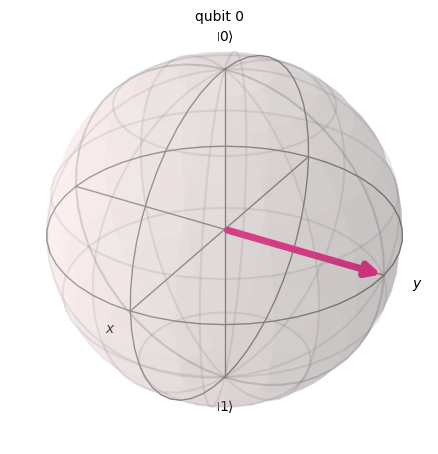

In [7]:
# Visualización sobre la esfera de Bloch
𝜓.draw('bloch')

In [8]:
# Definimos una función para visualizar el estado y la esfera a la vez
def muestra_estado(estado):
    display(estado.draw('latex', prefix="|𝜓\\rangle = "))
    display(estado.draw('bloch'))

<IPython.core.display.Latex object>

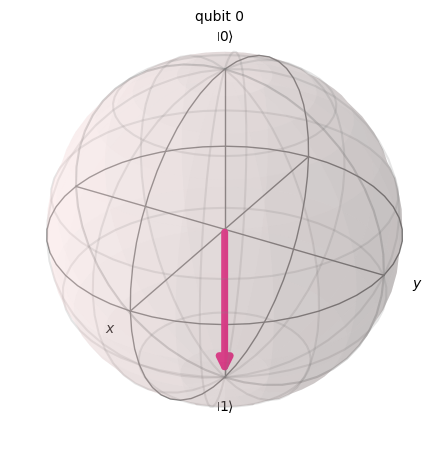

In [9]:
# Ejemplo de vector de estado |1>
𝜓 = Statevector([0, 1])
muestra_estado(𝜓)



---



---



## **Ejercicio entregable 1: Vector de estado**

a) Crea un estado con un 30% de probabilidad de medir un 0 y 70% de medir un 1 y muestra el vector de estado y la esfera de Bloch.

b) Obtén los valores de $\theta$ y $\phi$ para este estado.

In [ ]:
# Apartado a
a0 = None # @param {type:"raw"}
a1 = None # @param {type:"raw"}
estado30_70 = Statevector([a0,a1])
muestra_estado(estado30_70)

In [ ]:
# Apartado b
from math import acos,cos,sin,e,pi
theta = None # @param {type:"raw"}
phi = None # @param {type:"raw"}

# Para verificar que va bien,
# crea el estado a partir de los ángulos
# y comprueba que es el mismo de antes
estado2_30_70 = Statevector([cos(theta/2), e**(1j*phi)*sin(theta/2)])
muestra_estado(estado2_30_70)

In [ ]:
# Comprobamos el resultado calculando las probabilidades (probar a cambiar el valor de phi)
a0 = estado2_30_70.data[0]
a1 = estado2_30_70.data[1]
p0 = abs(a0)**2
p1 = abs(a1)**2
print(f"Probabilidad 0 = {p0}\nProbabilidad 1 = {p1}\n")

# Otra forma
p = estado2_30_70.probabilities()
print(f"Probabilidad 0 = {p[0]}\nProbabilidad 1 = {p[1]}")



---



---



## Múltiples cúbits<a id="varios"></a>

El vector de estado de un sistema de $n$ cúbits se puede expresar como una combinación lineal de estados de la forma $|q_{n-1}\ldots q_1q_0\rangle$, con $q_j\in\{0,1\}$ es decir:

$$
|\psi\rangle = a_0|00\ldots00\rangle + a_1|00\ldots01\rangle + a_2|00\ldots10\rangle +\cdots + a_{2^n-1} |11\ldots11\rangle= \sum_{i=0}^{2^{n}-1} a_i |i\rangle
$$
donde $a_i \in \mathbb{C}$ y $\sum_{i=0}^{2^n-1}|a_i|^2 = 1$.

Esto corresponde a un vector de estado de un espacio de Hilbert de dimensión $2^n$, usando la base canónica $\{|00\ldots00\rangle, |00\ldots01\rangle, |00\ldots10\rangle,\ldots|11\ldots11\rangle\}$.


### Sistema de dos cúbits<a id="dos"></a>
La dimensión del espacio es 4 y los vectores de elementos de la base canónica $\{|00\rangle, |01\rangle, |10\rangle, |11\rangle\}$ se obtienen como el producto tensor de los elementos $\{|0\rangle, |1\rangle\}$:

$$
|00\rangle = |0\rangle\otimes|0\rangle = \begin{bmatrix}1\\0\end{bmatrix}\otimes \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}1\\0\\0\\0\end{bmatrix} $$
$$ |01\rangle = |0\rangle\otimes|1\rangle = \begin{bmatrix}1\\0\end{bmatrix}\otimes \begin{bmatrix}0\\1\end{bmatrix} = \begin{bmatrix}0\\1\\0\\0\end{bmatrix}
$$

$$
|10\rangle = |1\rangle\otimes|0\rangle = \begin{bmatrix}0\\1\end{bmatrix}\otimes \begin{bmatrix}1\\0\end{bmatrix} = \begin{bmatrix}0\\0\\1\\0\end{bmatrix} $$
$$
|11\rangle = |1\rangle\otimes|1\rangle = \begin{bmatrix}0\\1\end{bmatrix}\otimes \begin{bmatrix}0\\1\end{bmatrix} = \begin{bmatrix}0\\0\\0\\1\end{bmatrix}
$$

Por lo tanto:

$$
|\psi\rangle = a_0\begin{bmatrix}1\\0\\0\\0\end{bmatrix} + a_1\begin{bmatrix}0\\1\\0\\0\end{bmatrix} + a_2\begin{bmatrix}0\\0\\1\\0\end{bmatrix} + a_3\begin{bmatrix}0\\0\\0\\1\end{bmatrix} = \begin{bmatrix}a_0\\a_1\\a_2\\a_3\end{bmatrix} =\\[30pt]
a_0|00\rangle+a_1|01\rangle+a_2|10\rangle+a_3|11\rangle = \\[10pt]
a_0|0\rangle+a_1|1\rangle+a_2|2\rangle+a_3|3\rangle
$$



### Combinación de estados
Sean los cúbits

$$
|\upsilon\rangle = a_0|0\rangle + a_1|1\rangle
$$

$$
|\phi\rangle = b_0|0\rangle + b_1|1\rangle
$$

El vector de estado del estado global formado por los dos cúbits es:

$$
|\psi\rangle = |\upsilon\phi\rangle = |\upsilon\rangle\otimes |\phi\rangle = (a_0|0\rangle + a_1|1\rangle)\otimes (b_0|0\rangle + b_1|1\rangle) = a_0b_0|00\rangle+a_0b_1|01\rangle+a_1b_0|10\rangle+a_1b_1|11\rangle
$$

<p><br></p>
    
----------------------------

**Ejemplo**

Obtener el vector de estado combinación de los cúbits $|+\rangle$ y $|-\rangle$

$$
|+\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle+|1\rangle),\quad |-\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle-|1\rangle)
$$

$$
|+-\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle+|1\rangle)\otimes\tfrac{1}{\sqrt{2}}(|0\rangle-|1\rangle) = \tfrac{1}{2}(|00\rangle-|01\rangle+|10\rangle-|11\rangle)=
\begin{bmatrix}\tfrac{1}{2}\\-\tfrac{1}{2}\\\tfrac{1}{2}\\-\tfrac{1}{2}\end{bmatrix}
$$

----------------------------


### Formas de inicializar un estado multicúbit en Qiskit

In [ ]:
# A partir de una lista
l = [1/2,-1/2,1/2,-1/2]
e = Statevector(l)
muestra_estado(e)

In [ ]:
# A partir de los estados |0> y |1>
e0 = Statevector.from_int(0, dims=2)  # dims indica la dimensión del estado
e1 = Statevector.from_int(1, dims=2)

# Producto tensor
e = ((e0^e0)-(e0^e1)+(e1^e0)-(e1^e1))/2
# Alternativa
#e = (e0.tensor(e0)-e0.tensor(e1)+e1.tensor(e0)-e1.tensor(e1))/2

e.draw('latex')

In [ ]:
# Combinación de e estados individuales
# Estados individuales
emas = Statevector([1/sqrt(2), 1/sqrt(2)])
emenos = Statevector([1/sqrt(2), -1/sqrt(2)])

emasmenos = emas^emenos
muestra_estado(emasmenos)

<a name="restricciones"></a>
## Restricciones de los cúbits

A la hora de trabajar con cúbits hay que considerar tres restricciones

a. No clonado

b. Reversibilidad

c. Medida destructiva

### No clonado

No es posible obtener un duplicado de un estado cuántico (es decir, no es posible una puerta fan-out)

<center><img src="https://drive.google.com/uc?export=view&id=1FQCVX5DgqV0PdCTOl2UBYX_EYf0Mw--W" alt="No clonado" width="200"/></center>

<details><summary>Pulsa aquí ver una demostración del principio de no-clonado</summary>

Sean $|\psi\rangle$ y $|\phi\rangle$ dos estados cuánticos tales que $|\psi\rangle|\phi\rangle\neq 0$. Supongamos una transformación unitaria $U$ que clona un estado cuántico arbitrario en otro cúbit. $U$ podría definirse como:

$$U(|\psi\rangle|0\rangle) = |\psi\rangle|\psi\rangle$$
$$U(|\phi\rangle|0\rangle) = |\phi\rangle|\phi\rangle$$


Sea $|\varphi\rangle = \frac{1}{\sqrt{2}}(|\psi\rangle+|\phi\rangle)$. Aplicando $U$ a este estado combiando, y dada la linealidad de los operadores cuánticos:

$$
\begin{aligned}
U(|\varphi\rangle|0\rangle) & = \frac{1}{\sqrt{2}}U\left((|\psi\rangle+|\phi\rangle)|0\rangle\right) =  \frac{1}{\sqrt{2}}U\left(|\psi\rangle|0\rangle+|\phi\rangle|0\rangle\right)\\[10pt]
&= \frac{1}{\sqrt{2}}\left(U(|\psi\rangle|0\rangle)+U(|\phi\rangle|0\rangle)\right) =
\frac{1}{\sqrt{2}}\left(|\psi\rangle|\psi\rangle+|\phi\rangle|\phi\rangle\right)
\end{aligned}
$$

Pero por otro lado, dada la definición de $U$:

$$
\begin{aligned}
U(|\varphi\rangle|0\rangle) &= |\varphi\rangle|\varphi\rangle = \frac{1}{2}(|\psi\rangle+|\phi\rangle)(|\psi\rangle+|\phi\rangle)\\[10pt]
&= \frac{1}{2}(|\psi\rangle|\psi\rangle+|\psi\rangle|\phi\rangle+|\phi\rangle|\psi\rangle+|\phi\rangle|\phi\rangle) \neq \frac{1}{\sqrt{2}}\left(|\psi\rangle|\psi\rangle+|\phi\rangle|\phi\rangle\right)
\end{aligned}
$$
</details>

### Reversibilidad

Toda operación realizada sobre un estado cuántico (excepto la medición) tiene que ser reversible.

### Medida destructiva

La medida es destructiva: al medir un estado cuántico, el estado se pierde



---



---



---



<a name="cuanticas"></a>
# **Puertas cuánticas**

Al igual que en ej caso clásico, las puertas cuánticas se pueden expresar como matrices.

Debido al requisito de reversibilidad, las puertas cuánticas **tienen que ser reversibles**.

Además, para que la salida de aplicar una puerta siga siendo un cúbit, la puerta debe conservar la norma del vector.

Puertas que cumplan ambas condiciones se pueden representar mediante matrices unitarias.

Una matriz unitaria $U$ que actúa sobre un estado cuántico de $n$ cúbits es una matriz $2^n\times 2^n$ que verifica  $U^\dagger U = UU^\dagger = I$, siendo $U^\dagger$ la conjugada transpuesta de $U$.

La inversa de $U$ por lo tanto es $U^{-1} = U^\dagger$

Al igual que en el caso clásico, la puerta se aplica al estado mediante un producto matriz-vector:
$$
|\Phi\rangle = U|\psi\rangle = \begin{bmatrix}u_{00} & u_{01} \\ u_{10} & u_{11} \end{bmatrix}\begin{bmatrix}a_{0} \\ a_{1}\end{bmatrix}
$$

<a name="1cubit"></a>
# **Puertas cuánticas de 1 cúbit**

Para bits, la única puerta de 1 bit es la NOT.

Para cúbits existen, en principio, infinitas puertas que modifican el estado del mismo (todas las matrices unitarias 2x2).

### Puertas (o matrices) de Pauli

$$
\sigma_0\equiv I = \begin{bmatrix}1 & 0\\0 & 1\end{bmatrix}
$$

$$
\sigma_1\equiv\sigma_x\equiv X \equiv NOT = \begin{bmatrix}0 & 1\\1 & 0\end{bmatrix}
$$

$$
\sigma_2\equiv \sigma_y \equiv Y = \begin{bmatrix}0 & -i\\i & 0\end{bmatrix}
$$

$$
\sigma_3\equiv\sigma_z\equiv Z = \begin{bmatrix}1 & 0\\0 & -1\end{bmatrix}
$$

Estas matrices son involutivas: $X^2=Y^2=Z^2=-iXYZ=I$

----------------------------------------------------------

**Ejemplos**

Puerta X (NOT en base $\{|0\rangle,|1\rangle\}$)

$$
\begin{aligned}
X|0\rangle = \begin{bmatrix}0 & 1\\1 & 0\end{bmatrix}\begin{bmatrix}1 \\ 0\end{bmatrix} = \begin{bmatrix}0 \\ 1\end{bmatrix} = |1\rangle \\[10pt]
X|1\rangle = \begin{bmatrix}0 & 1\\1 & 0\end{bmatrix}\begin{bmatrix}0 \\ 1\end{bmatrix} = \begin{bmatrix}1 \\ 0\end{bmatrix} = |0\rangle
\end{aligned}
$$

Puerta Z (_phase shift_ de $\pi$ radianes o NOT en base $\{|+\rangle,|-\rangle\}$)

$$
\begin{aligned}
Z|+\rangle = \tfrac{1}{\sqrt{2}}\begin{bmatrix}1 & 0\\0 & -1\end{bmatrix}\begin{bmatrix}1 \\ 1\end{bmatrix} = \tfrac{1}{\sqrt{2}}\begin{bmatrix}1 \\ -1\end{bmatrix} = |-\rangle \\[10pt]
Z|-\rangle = \tfrac{1}{\sqrt{2}}\begin{bmatrix}1 & 0\\0 & -1\end{bmatrix}\begin{bmatrix}1 \\ -1\end{bmatrix} = \tfrac{1}{\sqrt{2}}\begin{bmatrix}1 \\ 1\end{bmatrix} = |+\rangle
\end{aligned}
$$


### Circuitos de 1 cúbit en Qiskit

En Qiskit, los cúbits se inicializan a $|0\rangle$ por defecto y se aplican puertas para obtener el estado deseado.

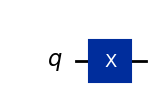

In [5]:
from qiskit import QuantumCircuit
# Circuito de 1 cúbit en el estado |0> con una puerta X
qc = QuantumCircuit(1)

# Aplicamos la puerta X al cúbit
qc.x(0)

qc.draw('mpl')

In [10]:
# Podemos ver el vector de estado resultante de aplicar la puerta X
from qiskit.quantum_info import Statevector

e1 = Statevector.from_instruction(qc)
e1.draw('latex', prefix='X|0\\rangle = ')

<IPython.core.display.Latex object>

In [11]:
# Otra forma de hacerlo
e0 = Statevector.from_label('0')
e1 = e0.evolve(qc)

e1.draw('latex', prefix='X|0\\rangle = ')

<IPython.core.display.Latex object>



---

### Ejercicio: Puerta Z
Crea un circuito de 1 cúbit en estado $|+\rangle$, aplícale una puerta $Z$ y obtén el vector de estado de salida.

In [ ]:
# Circuito de 1 cúbit en el estado |+> con una puerta Z
from math import sqrt
qc = QuantumCircuit(1)

# Podemos hacer que el estado inicial del circuito sea diferente de |0>
# Inicializa el circuito al estado |+>
qc.initialize(....)

# Aplicamos la puerta Z al cúbit
qc....

# Muestra el circuito y el estado




---



### Aplicación de varias puertas

Al igual que en el caso clásico, si aplicamos varias puertas sobre un mismo cúbit la matriz equivalente será el producto de las matrices de cada puerta.

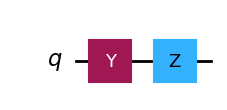

In [13]:
# Circuito con varias puertas simples
qc = QuantumCircuit(1)
qc.y(0)
qc.z(0)

qc.draw('mpl')

In [14]:
from qiskit.quantum_info import Operator
# Obtenemos la matriz unitaria equivalente
unitary = Operator(qc)
unitary.draw('latex', prefix="ZY = ")

<IPython.core.display.Latex object>

Debido a que el producto de matrices no es conmutativo, al obtener la matriz equivalente, tenemos que tener en cuenta que el orden en el que se aplican las puertas:

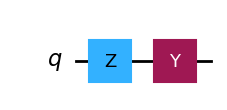

<IPython.core.display.Latex object>

In [17]:
# Circuito con dos puertas y obtenemos la matriz unitaria equivalente
qc = QuantumCircuit(1)
qc.z(0)
qc.y(0)
display(qc.draw('mpl'))
unitary = Operator(qc)
unitary.draw('latex', prefix="YZ = ")

### Puerta _phase shift_

Puertas que cambian la fase relativa:

$$
P_\theta  = \begin{bmatrix}1 & 0 \\ 0 & e^{i\theta} \end{bmatrix}
$$

La inversa de $P_\theta$ es su conjugada traspuesta:
$$
P_\theta^\dagger = \begin{bmatrix}1 & 0 \\ 0 & e^{-i\theta} \end{bmatrix}
$$



---


**Ejemplo:**

$$
P_\theta|+\rangle = \tfrac{1}{\sqrt{2}}\begin{bmatrix}1 & 0 \\ 0 & e^{i\theta} \end{bmatrix}\begin{bmatrix}1 \\ 1\end{bmatrix} = \tfrac{1}{\sqrt{2}}\begin{bmatrix}1 \\ e^{i\theta}\end{bmatrix} = \tfrac{1}{\sqrt{2}}(|0\rangle + e^{i\theta}|1\rangle)
$$



---


Casos particulares:

$$
Z = P_\pi = \begin{bmatrix}1 & 0 \\ 0 & e^{i\pi} \end{bmatrix} = \begin{bmatrix}1 & 0 \\ 0 & -1 \end{bmatrix}
$$

$$
S = P_{\pi/2} = \begin{bmatrix}1 & 0 \\ 0 & e^{i\pi/2} \end{bmatrix} = \begin{bmatrix}1 & 0 \\ 0 & i \end{bmatrix} = \sqrt{Z}
$$

$$
T = P_{\pi/4} = \begin{bmatrix}1 & 0 \\ 0 & e^{i\pi/4} \end{bmatrix} = \sqrt{S}
$$


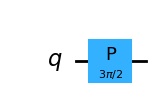

<IPython.core.display.Latex object>

In [33]:
# Ejemplo: puerta fase  3𝜋/2
import numpy as np
qc = QuantumCircuit(1)
theta = 3*np.pi/2
qc.p(theta, 0)
display(qc.draw('mpl'))

unitary = Operator(qc)
unitary.draw('latex', prefix="P_{3\\pi/2} = ")

### Puerta Hadamard

$$
H = \tfrac{1}{\sqrt{2}}\begin{bmatrix}1 & 1 \\ 1 & -1 \end{bmatrix}
$$

Esta puerta permite transformar un estado simple ($|0\rangle$ o $|1\rangle$) en un estado en superposición.


---


**Ejemplos**

$$
H|0\rangle = \tfrac{1}{\sqrt{2}}\begin{bmatrix}1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix}1 \\ 0 \end{bmatrix} =  \tfrac{1}{\sqrt{2}}\begin{bmatrix}1 \\ 1 \end{bmatrix} = \tfrac{1}{\sqrt{2}}(|0\rangle+|1\rangle) =  |+\rangle
$$

$$
H|1\rangle = \tfrac{1}{\sqrt{2}}\begin{bmatrix}1 & 1 \\ 1 & -1 \end{bmatrix} \begin{bmatrix}0 \\ 1 \end{bmatrix} =  \tfrac{1}{\sqrt{2}}\begin{bmatrix}1 \\ -1 \end{bmatrix} = \tfrac{1}{\sqrt{2}}(|0\rangle-|1\rangle) =  |-\rangle
$$


---

### Ejercicio: puerta H

Crea un circuito de 1 cúbit. Usa una puerta para poner el cúbit en el estado |1\rangle, aplícale una puerta $H$ y muestra el vector de estado de salida.

In [ ]:
# Crea un circuito de 1 cúbit
qc = ....

# Aplica la puerta para obtener el estado |1>
qc....

# Aplica la puerta H
qc....

# Muestra el circuito y el estado final





---



<a name="bloch"></a>
## Puertas como rotaciones en la esfera de Bloch

Las puertas pueden verse como una rotación del cúbit en la esfera de Bloch:

- $X$, $Y$, $Z$: rota un ángulo $\pi$ alrededor del eje X, Y o Z, respectivamente
- $R_\theta$ o $R_z(\theta)$: rota un ángulo $\theta$ alrededor del eje Z
- $S$: rota $\tfrac{\pi}{2}$ alrededor del eje Z
- $T$: rota $\tfrac{\pi}{4}$ alrededor del eje Z
- $H$:  combinación de dos rotaciones: primero $\pi$ alrededor de Z seguida de $\pi/2$ alrededor de y

En general, existen infinitas puertas. Las más usadas son rotaciones alrededor de Z, simplemente por usar como base estándar $\{|0\rangle,|1\rangle\}$, pero también existen $R_x(\phi)$ y $R_y(\phi)$. Estas rotaciones se pueden expresar como exponenciales de las matrices de Pauli:

$$
R_x(\theta) = e^{-i\theta \sigma_x/2} = \cos\frac{\theta}{2}I-i\sin\frac{\theta}{2}\sigma_x =
\begin{bmatrix}
\cos\frac{\theta}{2}   & -i\sin\frac{\theta}{2}\\
-i\sin\frac{\theta}{2} & \cos\frac{\theta}{2}
\end{bmatrix}
$$

$$
R_y(\theta) = e^{-i\theta \sigma_y/2} = \cos\frac{\theta}{2}I-i\sin\frac{\theta}{2}\sigma_y =
\begin{bmatrix}
\cos\frac{\theta}{2}   & -\sin\frac{\theta}{2}\\
\sin\frac{\theta}{2} & \cos\frac{\theta}{2}
\end{bmatrix}
$$

$$
\begin{aligned}
R_z(\theta) & = e^{-i\theta \sigma_z/2} = \cos\frac{\theta}{2}I-i\sin\frac{\theta}{2}\sigma_z =
\begin{bmatrix}
e^{-i\frac{\theta}{2}}   & 0\\
0 & e^{i\frac{\theta}{2}}
\end{bmatrix} \\
&=
e^{-i\frac{\theta}{2}} \begin{bmatrix}
1   & 0\\
0 & e^{i\theta}
\end{bmatrix}= e^{-i\frac{\theta}{2}}P_\theta
\end{aligned}
$$

Así, la puerta $H$ puede escribirse como:
$$
\begin{aligned}
H &= R_y(\tfrac{\pi}{2})R_z(\pi) =
\begin{bmatrix}
\cos\frac{\pi}{4}   & -\sin\frac{\pi}{4}\\
\sin\frac{\pi}{4} & \cos\frac{\pi}{4}
\end{bmatrix}
\begin{bmatrix}
1   & 0\\
0 & e^{i\pi}
\end{bmatrix} \\[10pt] &=
\frac{1}{\sqrt{2}}
\begin{bmatrix}
1   & -1\\
1 & 1
\end{bmatrix}
\begin{bmatrix}
1   & 0\\
0 & -1
\end{bmatrix} =
\frac{1}{\sqrt{2}}
\begin{bmatrix}
1   & 1\\
1 & -1
\end{bmatrix}
\end{aligned}
$$




---



---

## **Ejercicio entregable 2: Puerta $R_y(\theta)$**



Aplica una puerta $R_y(\theta)$ a un cúbit en estado $|0\rangle$ para obtener un estado con un 30% de probabilidad de medir 0 y un 70% de medir 1
- Recuerda que podemos escribir el estado como $|\psi\rangle = \cos{\tfrac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle$


In [25]:
from math import sqrt,acos

prob = [0.3, 0.7]

qc = QuantumCircuit(1)

# Calcula el valor de 𝜃
theta = None # @param {type:"raw"}
print(f"𝜃 = {theta}")

# Muestra el circuito y el vector de estado final

𝜃 = None




---



---



<a name="puertas1c"></a>
## Puertas de 1 cúbit en un sistema multicúbit

Igual que en el caso de puertas clásicas, las puertas en paralelo (que actúan sobre dos cúbits diferentes) se combinan usando el producto tensor.

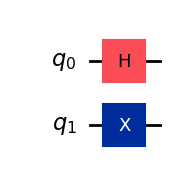

<IPython.core.display.Latex object>

In [28]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
display(qc.draw('mpl'))
u = Operator(qc)
u.draw('latex', prefix="X\\otimes H = ")

El efecto conjunto de ambas puertas puede obtenerse mediante el producto tensor de sus matrices (en el caso de Qiskit el orden es del cúbit más al menos significativo):

$$
X|q_1\rangle \otimes H|q_0\rangle = (X\otimes H)|q_1 q_0\rangle
$$

Ese producto tensor es:

$$
\begin{aligned}
X\otimes H &= \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \otimes \tfrac{1}{\sqrt{2}}\begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix} = \frac{1}{\sqrt{2}}
\begin{bmatrix} 0 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
              & 1 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
                \\
                1 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
              & 0 \times \begin{bmatrix} 1 & 1 \\ 1 & -1 \end{bmatrix}
\end{bmatrix} \\
&= \frac{1}{\sqrt{2}}
\begin{bmatrix} 0 & 0 & 1 & 1 \\
                0 & 0 & 1 & -1 \\
                1 & 1 & 0 & 0 \\
                1 & -1 & 0 & 0 \\
\end{bmatrix}
\end{aligned}
$$

que se multiplica por el vector de dimensión 4 $|q_1 q_0\rangle$.

La matriz anterior se puede escribir como:

$$
X\otimes H =
\begin{bmatrix} 0 & H \\
               H & 0\\
\end{bmatrix}
$$


Si solo tenemos una puerta actuando sobre un cúbit, se considera que sobre la otra actúa la puerta $I$

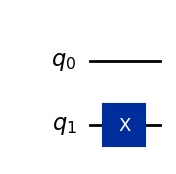

<IPython.core.display.Latex object>

In [29]:
qc = QuantumCircuit(2)
qc.x(1)
display(qc.draw('mpl'))
u = Operator(qc)
u.draw('latex', prefix="X\\otimes I = ")

En este ejemplo, las puertas aplicadas son:
$$
X|q_1\rangle \otimes I|q_0\rangle = (X\otimes I)|q_1 q_0\rangle
$$

Otro ejemplo más complejo:

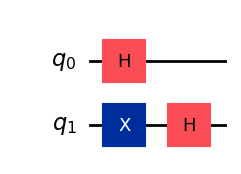

<IPython.core.display.Latex object>

In [32]:
# 2 cúbits y 3 puertas
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
display(qc.draw('mpl'))
u = Operator(qc)
u.draw('latex', prefix="(H\\otimes I)\\cdot(X\\otimes H) = HX\\otimes IH = ")



---



---



---



 <a name="cnot"></a>
# **Puertas controladas: CNOT**

Puerta CNOT: Actúa sobre 2 cúbits
  - Realiza un NOT (puerta X) en el cúbit objetivo (_target_) si el estado del cúbit de control es $|1\rangle$. La puerta se representa en un circuito como la del siguiente ejemplo, con `q0` como control y `q1` como target.

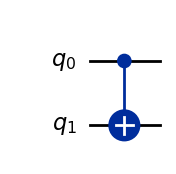

<IPython.core.display.Latex object>

In [35]:
qc = QuantumCircuit(2)
# Aplica CNOT, primer parámetro control, segundo target
qc.cx(0,1)
display(qc.draw('mpl'))
u = Operator(qc)
u.draw('latex', prefix="CNOT = ")

Esta matriz intercambia las amplitudes de los estados $|01\rangle$ y $|11\rangle$ del vector de estado (aquellos en las que el cúbit de control `q0` es 1):

$$
|\psi\rangle = \begin{bmatrix} a_{0} \\ a_{1} \\ a_{2} \\ a_{3} \end{bmatrix}, \quad \text{CNOT}|\psi\rangle = \begin{bmatrix} a_{0} \\ a_{3} \\ a_{2} \\ a_{1} \end{bmatrix} \begin{matrix} \\ \leftarrow \\ \\ \leftarrow \end{matrix}
$$

In [41]:
from qiskit.quantum_info import random_statevector
# Probamos con un estado inicial aleatorio
e0 = random_statevector(dims=4, seed=13) # dims: dimensión del estado = 2^numero_cubits
e1 = e0.evolve(qc)

display(e0.draw('latex'))
e1.draw('latex')

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

## Estados entrelazados (_entangled_)
Estados especiales con propiedades muy interesantes:

- No se pueden expresar como el producto tensor de dos estados de dimensión inferior
- La medida de uno de los cúbits determina de forma inmediata el valor del segundo, aunque los cúbits estén separados por cualquier distancia:
  - [‘Spooky action at a distance’](https://en.wikipedia.org/wiki/Quantum_nonlocality)
  
----------------------------

**Ejemplo**

$$
|\beta\rangle = \tfrac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$

Este es uno de los denominados [estados de Bell](https://en.wikipedia.org/wiki/Bell_state).

----------------------------

Al no poder descomponer un estado entrelazado en el producto tensor de dos estados individuales, no es posible representarlos en una esfera de Bloch para cada cúbit.

In [43]:
e0 = Statevector.from_int(0, dims=2)  # dims indica la dimensión del estado
e1 = Statevector.from_int(1, dims=2)

ebell = ((e0^e0)+(e1^e1))/sqrt(2)
# Alternativa
#ebell = Statevector([1/sqrt(2), 0, 0, 1/sqrt(2)])

ebell.draw('latex', prefix="\\beta_0 = ")

<IPython.core.display.Latex object>

<a name="medida"></a>
# **Medida del estado**

La medida del cúbit $|\psi\rangle = a_0|0\rangle + a_1|1\rangle$ devuelve un 0 con probabilidad $|a_0|^2$ y un 1 con probabilidad $|a_1|^2$. Estas probabilidades pueden obtenerse como:

$$
p(0) = |\langle 0|\psi\rangle|^2 = |\langle 0|a_0|0\rangle + \langle 0|a_1|1\rangle|^2 = |a_0|^2\\
p(1) = |\langle 1|\psi\rangle|^2 = |\langle 1|a_0|0\rangle + \langle 1|a_1|1\rangle|^2 = |a_1|^2
$$

La suma de ambas probabilidades es: $$p(0)+p(1) = |a_0|^2 + |a_1|^2 = 1$$

Si expresamos el estado usando la esfera de Bloch $|\psi\rangle = \cos{\tfrac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle$ las probabilidades son:

$$p(0) = \left|\cos{\tfrac{\theta}{2}}\right|^2 = \cos^2{\tfrac{\theta}{2}}$$

$$p(1) = \left|e^{i\phi}\sin{\tfrac{\theta}{2}}\right|^2 = \sin^2{\tfrac{\theta}{2}}$$

verificandose que:

$$p(0) + p(1) = \cos^2{\tfrac{\theta}{2}} + \sin^2{\tfrac{\theta}{2}} = 1$$

### Estado tras la medida
El estado después de la medida viene determinado por lo que se haya medido:

- Medimos 0 $\Rightarrow |\psi^\prime\rangle = |0\rangle$
- Medimos 1 $\Rightarrow |\psi^\prime\rangle = |1\rangle$

El resultado de la medida es un valor clásico (0 o 1) y es probabilístico $\Rightarrow$ son necesarias varias medidas para obtener un resultado significativo.

----------------------------

**Ejemplo**

Dado el estado de 1 cúbit $|\psi\rangle = \tfrac{1}{\sqrt{3}}(|0\rangle + \sqrt{2}|1\rangle)$ las probabilidad de obtener un 1 al medir es

$$p(1) = \left|\frac{\sqrt{2}}{\sqrt{3}}\right|^2 = \frac{2}{3}$$
y el estado después de la medida es $|\psi'\rangle = |1\rangle$

----------------------------

#### Medida en Qiskit
Creamos un circuito cuántico con 1 cúbit en el estado $|\psi\rangle = \tfrac{1}{\sqrt{3}}(|0\rangle + \sqrt{2}|1\rangle)$ y lo simulamos con Aer

In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from math import sqrt

# Creamos un circuito cuántico de 1 cúbit y 1 bit clásico para la medida
qc = QuantumCircuit(1,1)

# Inicializamos el cúbit al estado 1/√3(|0⟩+√2|1⟩)
qc.initialize(Statevector([1/sqrt(3), sqrt(2)/sqrt(3)]))

 # Le añadimos la medida
qc.measure(0,0)

# Indicamos que guarde el vector de estado (después de la medida)
qc.save_statevector()

# Mostramos el circuito
qc.draw('mpl')

In [ ]:
# Utilizamos el AerSimulator en modo automático
sim = AerSimulator(method='automatic')
# Hacemos una simulación y obtenemos los resultados
result = sim.run(transpile(qc,sim), shots=1).result()

plot_histogram(result.get_counts())

In [ ]:
# Obtenemos el estado después de la medida
estado_final = result.get_statevector()
muestra_estado(estado_final)

La medida es probabilística, por lo que normalmente se realizan múltiples medidas y se obtiene un histograma de las salidas.

In [ ]:
# Hacemos 1000 simulaciones (shots)
result = sim.run(transpile(qc,sim), shots=1024).result()

# Mostramos el histograma
plot_histogram(result.get_counts())

## Ejercicio: Medir el estado de 1 cúbit

Crear un circuito para un estado con un 80% de probabilidad de medir un 0 y 20% de medir un 1 y haz la medida.

In [ ]:
a0 = ...
a1 = ...
estado80_20 = ...

# Crea un circuito cuántico de 1 cúbit y 1 bit clásico para la medida
qc = ...

# Inicializamos el cúbit al estado 80_20
qc.initialize(estado80_20)

 # Le añadimos la medida
qc.measure(...)

# Utilizamos el simulador Aer
sim = AerSimulator()

# Hacemos 1024 simulaciones (shots) y obtenemos los resultados
result = sim.run(...).result()

# Mostramos el histograma
plot_histogram(result.get_counts())

## Medidas en sistemas multi-cúbit

Al medir el sistema $|\psi\rangle=\sum_{i=0}^{n-1} a_i |i\rangle$, la probabilidad de obtener el valor $i$, con $i=0,\ldots,n-1$, viene dada por la *Regla de Born*:

$$p(i) = |\langle i|\psi\rangle|^2 =  \langle\psi|i\rangle\langle i|\psi\rangle = \langle\psi|P_i|\psi\rangle = |a_i|^2$$

donde $P_i = |i\rangle\langle i|$ es una matriz que se denomina *operador de proyección*, pues proyecta el vector de estado sobre el subespacio generado por el estado base $|i\rangle$.

El proceso de medida hace que el estado _colapse_, y el estado después de la medida es $|i\rangle$.

Lo que hacemos al medir es obtener la proyección del estado sobre el vector $|i\rangle$ de la base canónica.



Para 1 cúbit, la medida sobre la base canónica $\{|0\rangle, |1\rangle\}$ se denomina _medida Z_ porque equivale a proyectar el vector de estado sobre el eje Z de la esfera de Bloch. Es la medida más habitual (por no decir, la única), pero, en teoría, se podría medir un estado sobre cualquier base. Así tendríamos la _medida X_ usando la base $\{|+\rangle, |-\rangle\}$ y la _medida Y_ usando la base $\{|\!\!+i\rangle, |\!\!-i\rangle\}$.

----------------------------

**Ejemplo**

Dado el estado de 2 cúbits $|\psi\rangle=a_0|00\rangle+a_1|01\rangle+a_2|10\rangle+a_3|11\rangle$, la posibilidad de obtener 10 al medir es:

$$
p(2) = \langle\psi|10\rangle\langle 10|\psi\rangle = a_2^*a_2 = |a_2|^2
$$

y el estado después de la medida es $|10\rangle$.

----------------------------

#### Medida de cúbits individuales en un sistema multi-cúbit
Si medimos cúbits individuales, la probabilidad se obtiene de forma similar. Por ejemplo, la probabilidad de obtener, en el estado del ejemplo anterior, un 1 cuando medimos el cúbit menos significativo es:

$$
p_{q0}(1) = p(1) + p(3) = |\langle 01|\psi\rangle|^2 + |\langle 11|\psi\rangle|^2 = |a_1|^2+|a_3|^2
$$

Y el estado despues de la medida es:

$$
|\psi'\rangle = \frac{a_1|01\rangle + a_3|11\rangle}{\sqrt{|a_1|^2+|a_3|^2}}
$$


In [ ]:
# Creamos un circuito cuántico de 2 cúbits y 2 bits clásicos de medida
# Esta vez usaremos registros cuánticos y clásicos
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Statevector

qr = QuantumRegister(size=2, name='cúbit')
cr = ClassicalRegister(size=2, name='bits')

qc = QuantumCircuit(qr,cr)

# Inicializamos el circuito al estado |+->
qc.initialize(Statevector([1/2, -1/2, 1/2, -1/2]))

# Le añadimos la medida (también se puede hacer con qc.measure_all())
for i in range(2):
    qc.measure(qr[i], cr[i])

# Mostramos el circuito
qc.draw('mpl')

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Utilizamos el simulador Aer
sim = AerSimulator(method='automatic')

# Hacemos múltiples simulaciones (shots)
result = sim.run(transpile(qc,sim), shots=1000).result()

# Mostramos el histograma
plot_histogram(result.get_counts())

Probamos ahora a medir solo el cúbit 1 y obtener el vector de estado del estado postarior a la medida.

In [ ]:
# Repetimos para medir solo el cúbit 1
qr = QuantumRegister(size=2, name='cúbit')
cr = ClassicalRegister(size=1, name='bit')

qc = QuantumCircuit(qr,cr)

# Inicializamos el circuito al estado |+->
qc.initialize(Statevector([1/2, -1/2, 1/2, -1/2]))

# Le añadimos la medida (también se puede hacer con qc.measure(1,0))
qc.measure(qr[1], cr)

# Salvamos el vector de estado en este punto
qc.save_statevector()

# Mostramos el circuito
qc.draw('mpl')

In [ ]:
# Hacemos una simulación
result = sim.run(transpile(qc,sim), shots=1).result()

plot_histogram(result.get_counts())

In [ ]:
# Obtenemos el estado después de la medida
estado_final = result.get_statevector()
muestra_estado(estado_final)

Este estado es

- Si medimos un 0: $\tfrac{1}{\sqrt{2}}(|00\rangle - |01\rangle) = |0\rangle\otimes|-\rangle$
- Si medimos un 1: $\tfrac{1}{\sqrt{2}}(|10\rangle - |11\rangle) = |1\rangle\otimes|-\rangle$

## Ejercicio: Medir un estado multi-cúbit

Crear un circuito de dos cúbits e inicializarlo al estado de Bell visto antes. Medir el cúbit $q_0$ y comprobar el estado después de la medida.

In [ ]:
# Estado entrelazado
ebell = Statevector([1/sqrt(2), 0, 0, 1/sqrt(2)])

# Crea un registro cuántico de 2 cúbits
qr = ...
# Crea un registro clásico de 1 bit
cr = ...

# Crea el circuito
qc = QuantumCircuit(...)

# Inicializamos el circuito al estado ebell
qc.initialize(...)

# Le añadimos la medida
qc.measure(...)

# Salvamos el vector de estado en este punto
qc.save_statevector()

# Mostramos el circuito
qc.draw('mpl')

In [ ]:
# Hacemos una simulación y obtenemos los resultados
result = ...

# Mostramos la salida
plot_histogram(result....)

In [ ]:
# Obtenemos el estado después de la medida
estado_final = result...
muestra_estado(estado_final)



---



---



---



<a name="observables"></a>
# **Observables, valor esperado y matrices de Pauli**

Un _observable_ representa cualquier cantidad que se pueda medir en estado cuántico (energía, posición, momento, etc.). A cada observable le corresponde un operador hermitiano $M$ en el espacio de estados del sistema bajo observación.

Como el operador $M$ es hermitiano $\rightarrow$ es diagonalizable $\rightarrow$ según el teorema de descomposición espectral $M$ se puede escribir como:

$$M = \sum_i \lambda_i P_i = \sum_i \lambda_i |u_i\rangle\langle u_i|$$

donde $|u_i\rangle$ son los autovectores (o autoestados) de $M$. Además, se verifica que los autovalores $\lambda_i$ son reales, $\lambda_i \in \mathbb{R}$.

**Medida general de un observable sobre un estado**

Cuando se mide un observable $M$ sobre un estado $|\psi\rangle$, las posibles salidas de la medida corresponden a los autovalores del observable $M$ y la probabilidad de obtener un resultado $\lambda_m$ es, igual que antes:
    
$$
p(\lambda_m) = |\langle u_m|\psi\rangle|^2 = \langle\psi|u_m\rangle\langle u_m|\psi\rangle = \langle\psi|P_m|\psi\rangle
$$

y el estado posterior a la medida queda como:

$$
|\psi'\rangle = \frac{P_m|\psi\rangle}{\sqrt{p(m)}} = \frac{|u_m\rangle\langle u_m|\psi\rangle}{|\langle u_m|\psi\rangle|}
$$

En este caso, el operador de proyección $P_i = |u_i\rangle\langle u_i|$ proyecta el vector de estado sobre el subespacio generado por el autovector $|u_i\rangle$.

**Ejemplo**

Un ejemplo de observable es simplemente mirar si un cúbit $|\psi\rangle$ está o no en el estado $|1\rangle$. Ese observable tiene asociada la matriz:

$$
M =  \begin{bmatrix}0 & 0\\0 & 1\end{bmatrix} = \lambda_0|0\rangle\langle0| + \lambda_1|1\rangle\langle1| = |1\rangle\langle1|
$$

Los autovalores esta matriz son son $0$ y $1$ y los autovectores correspondientes son $|0\rangle$ y $|1\rangle$.

Dado un estado $|\psi\rangle = a_0|0\rangle + a_1|1\rangle$ la probabilidad de obtener el autovalor $1$ es:

$$
p(1) = \langle\psi|P_1|\psi\rangle =  \langle\psi|1\rangle\langle 1|\psi\rangle
 = |a_1|^2
$$

y el estado posterior a la medida es:

$$
|\psi'\rangle = \frac{|1\rangle\langle 1|\psi\rangle}{|\langle 1|\psi\rangle|} = \frac{a_1}{|a_1|}|1\rangle \equiv |1\rangle
$$
    
## Valor esperado de un observable

El valor medio o valor esperado de un observable $M$ cuando observamos un estado $|\psi\rangle$ es:

$$
\langle M\rangle_{|\psi\rangle} = \sum_i \lambda_i p(\lambda_i) = \sum_i \lambda_i\langle\psi|P_i|\psi\rangle = \langle\psi|\left(\sum_i \lambda_i P_i\right)|\psi\rangle = \langle\psi|M|\psi\rangle
$$

y la desviación estándar asociada a las observaciones de $M$:

$$[\Delta(M)]^2 = \langle(M-\langle M\rangle)^2\rangle = \langle M^2\rangle - \langle M\rangle^2$$

Notar que el valor esperado de $M$ en uno de sus autoestados $|u_i\rangle$ es, precisamente, el autovalor asociado a ese autoestado:

$$
\langle M\rangle_{|u_i\rangle} = \langle u_i|M|u_i\rangle = \langle u_i|\lambda_i|u_i\rangle = \lambda_i
$$


**Ejemplo**
    
Un observable para un estado de 1 cúbit es medir si el vector de estado se encuentra sobre uno de los ejes de la esfera de Bloch. Por ejemplo, si medimos si se encuentra sobre el eje $Z$ la matriz asociada al observable es:

$$\sigma_z = \begin{bmatrix}1 & 0\\0 & -1\end{bmatrix}$$

Los autovalores de $\sigma_z$ son $1$ y $-1$ y los autovectores correspondientes son $|0\rangle$ y $|1\rangle$.
    
Supongamos que tenemos el estado $|\psi\rangle=a_0|0\rangle+a_1|1\rangle$. El valor esperado del observable $\sigma_z$ en ese estado es:

$$\langle \sigma_z\rangle = \langle\psi|\sigma_z|\psi\rangle =
\begin{bmatrix}a_0^* & a_1^*\end{bmatrix}
\begin{bmatrix}1 & 0\\0 & -1\end{bmatrix}
\begin{bmatrix}a_0 \\ a_1\end{bmatrix} = |a_0|^2-|a_1|^2
$$

Así, por ejemplo, si $|\psi\rangle=|0\rangle$ el valor esperado será:

$$\langle \sigma_z\rangle = \langle0|\sigma_z|0\rangle = 1$$

Si $|\psi\rangle=|1\rangle$ será:

$$\langle \sigma_z\rangle = \langle1|\sigma_z|1\rangle = -1$$

Y si $|\psi\rangle=|+\rangle=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$ será:

$$\langle \sigma_z\rangle = \langle+|\sigma_z|+\rangle =0$$

Los observables correspondientes a medir sobre el eje $X$ y el $Y$ son:

$$\sigma_x = \begin{bmatrix}0 & 1\\1 & 0\end{bmatrix}$$

$$\sigma_y = \begin{bmatrix}0 & -i\\i & 0\end{bmatrix}$$

## Matrices de Pauli

Las matrices $\sigma_x$, $\sigma_y$ y $\sigma_z$, junto con la matriz identidad $\mathbb{I}$, se denominan **matrices de Pauli** (u operadores de Pauli) y son básicas dentro de la cuántica.

Si usamos la esfera de Bloch, dado un estado $|\psi\rangle = \cos{\tfrac{\theta}{2}}|0\rangle + e^{i\phi}\sin{\tfrac{\theta}{2}}|1\rangle$, los valores esperados de estas matrices son:

$$
\begin{aligned}
\langle \sigma_x\rangle &= \langle\psi|\sigma_x|\psi\rangle =
\begin{bmatrix}\cos\tfrac{\theta}{2} & e^{-i\phi}\sin{\tfrac{\theta}{2}}\end{bmatrix}
\begin{bmatrix}0 & 1\\1 & 0\end{bmatrix}
\begin{bmatrix}\cos\tfrac{\theta}{2} \\ e^{i\phi}\sin{\tfrac{\theta}{2}}\end{bmatrix} =
    (e^{i\phi}+e^{-i\phi})\cos^2\tfrac{\theta}{2}\sin^2\tfrac{\theta}{2} =
2\cos\phi\cos^2\tfrac{\theta}{2}\sin^2\tfrac{\theta}{2}=\cos\phi\sin\theta\\[10pt]
\langle \sigma_y\rangle &= \langle\psi|\sigma_y|\psi\rangle =
\begin{bmatrix}\cos\tfrac{\theta}{2} & e^{-i\phi}\sin{\tfrac{\theta}{2}}\end{bmatrix}
\begin{bmatrix}0 & -i\\i & 0\end{bmatrix}
\begin{bmatrix}\cos\tfrac{\theta}{2} \\ e^{i\phi}\sin{\tfrac{\theta}{2}}\end{bmatrix} =
    i(e^{-i\phi}-e^{i\phi})\cos^2\tfrac{\theta}{2}\sin^2\tfrac{\theta}{2} =
2\sin\phi\cos^2\tfrac{\theta}{2}\sin^2\tfrac{\theta}{2}=\sin\phi\sin\theta\\[10pt]
\langle \sigma_z\rangle &= \langle\psi|\sigma_z|\psi\rangle =
\begin{bmatrix}\cos\tfrac{\theta}{2} & e^{-i\phi}\sin{\tfrac{\theta}{2}}\end{bmatrix}
\begin{bmatrix}1 & 0\\0 & -1\end{bmatrix}
\begin{bmatrix}\cos\tfrac{\theta}{2} \\ e^{i\phi}\sin{\tfrac{\theta}{2}}\end{bmatrix} =
\cos^2\tfrac{\theta}{2}-\sin^2\tfrac{\theta}{2} =
\cos\theta
\end{aligned}
$$

para obtener estas ecuaciones hemos usado la fórmula del ángulo medio:

$$
\cos^2\tfrac{\theta}{2} = \tfrac{1}{2}(1+\cos\theta)\\
\sin^2\tfrac{\theta}{2} = \tfrac{1}{2}(1-\cos\theta)
$$

Podemos ver que estos valores corresponden con las coordenadas cartesianas de $|\phi\rangle$ en la esfera de Bloch:

$$
\vec{r} = \begin{pmatrix}
r_x\\r_y\\r_z
\end{pmatrix} =
\begin{pmatrix}
\sin\theta\cos\phi\\\sin\theta\sin\phi\\\cos\theta
\end{pmatrix}=
\begin{pmatrix}
\langle \sigma_x\rangle\\\langle \sigma_y\rangle\\\langle \sigma_z\rangle
\end{pmatrix}
$$

--------------------------------------------------

#### Observable general

Un operador hermitiano $M$ asociado a un observable siempre puede expresarse como una combinación lineal de productos tensor de las matrices de Pauli $\{\mathbb{I}, \sigma_x, \sigma_y, \sigma_z\}$:

$$
M = \sum_i c_i P_i
$$

siendo $P_i$ un producto tensor de matrices de Pauli.

**Ejemplo**: Sea $M$ un observable de la forma:

$$
M = \frac{1}{2}\sigma_z\otimes I\otimes\sigma_x - 3 I\otimes \sigma_y\otimes\sigma_y + 2 \sigma_z\otimes \sigma_x\otimes\sigma_z
$$
Por tanto, se puede escribir:

$$
\langle M\rangle_{|\psi\rangle} = \langle\psi|M|\psi\rangle = \sum_i c_i \langle\psi|P_i|\psi\rangle =
\langle\psi|\left(\frac{1}{2}\sigma_z\otimes I\otimes\sigma_x - 3 I\otimes \sigma_y\otimes\sigma_y + 2 \sigma_z\otimes \sigma_x\otimes\sigma_z\right)|\psi\rangle = \\
\frac{1}{2}\langle\psi|\sigma_z\otimes I\otimes\sigma_x|\psi\rangle - 3\langle\psi|I\otimes \sigma_y\otimes\sigma_y|\psi\rangle +2\langle\psi|2 \sigma_z\otimes \sigma_x\otimes\sigma_z|\psi\rangle
 $$


<a name="errores"></a>
# **Errores, matrices de densidad y estados mezcla**

Diferentes fuentes de error producen fallos en la computación:

 - Errores en la preparación del estado y en la medida
 - Errores en las puertas
 - Errores en estadísticos debidos a un número finito de medidas
 - Errores debidos al ruido ambiental

Se necesitan técnicas de corrección de errores:

  - Para implementar 1 cúbit _lógico_ (sin error) se necesitan varios cúbits físicos

Los sistemas actuales, con pocos cúbits y con errores, se denominan NISQ (_Noisy intermediate-scale quantum_)

### Tiempos de decoherencia

El ruido puede hacer que con el tiempo el estado de un cúbit cambie

 - $T_1$ (tiempo de relajación): tiempo en que un estado $|1\rangle$ decae a $|0\rangle$
   - La probabilidad de que el cúbit siga a $|1\rangle$ tras un tiempo $t$ es $P(|1\rangle) = e^{-\frac{t}{T_1}}$
 - $T_2$ (tiempo de _dephasing_): tiempo en el que un estado $|+\rangle$ decae a un estado _mezcla_

Estos valores limitan el tiempo (y, por tanto, la complejidad) de un algoritmo en un computador cuántico

Los valores concretos dependen de la tecnología:

  - De decenas de $\mu s$ a milisegundos


### Matrices de densidad y estados mezcla

Los cúbits que venimos usando (y seguiremos usando) se dice que están en un estado "puro": se pueden expresar mediante un vector de estado.

Debido al ruido, el estado de los cúbits puede cambian a un estado indeseado, denominado estado "mezcla" (_mixed state_):

- Un estado mezcla es una combinación de estados puros con diferentes probabilidades para cada estado
- Son estados indeseables, pues se reduce la información que proporcionan

Una matriz de densidad permite expresar tanto los estados puros como los estados mezcla.

#### Propiedades de la matriz de densidad
Una matriz de densidad $\rho$ es una matriz cuadrada con las siguientes propiedades:

- Es hermitiana $\Rightarrow$ sus autovalores $\lambda_i \in \mathbb{R}$
- Su _traza_ (suma de los elementos de la diagonal o suma de los autovalores) es 1: $\mathrm{tr}(\rho) = \sum_i \lambda_i = 1$
- Es un operador positivo, es decir, para cualquier vector $|v\rangle$ se tiene que $\langle v|\rho|v\rangle \ge 0$ $\Rightarrow$ sus autovalores son todos $\lambda_i \ge 0$

Por lo tanto, tendremos que $0 \le \lambda_i \le 1, \forall i$

Dada esta propiedades, una matriz de densidad es diagonalizable y por el teorema de descomposición espectral podemos escribir:

$$
\rho = \sum_i \lambda_i|v_i\rangle\langle v_i|
$$
siendo $\lambda_i$ y $|v_i\rangle$ los autovalores y autovectores de $\rho$.

#### Estados puros y matriz de densidad

La matriz de densidad de un estado puro $|\psi\rangle$ se optiene como:

$$
\rho = |\psi\rangle\langle\psi|
$$

Así, para 1 cúbit, la matriz de densidad de un estado $|\psi\rangle = a_0|0\rangle + a_1|1\rangle$ será

$$
\rho = |\psi\rangle\langle\psi| =
\begin{bmatrix}
a_0 \\ a_1
\end{bmatrix}
\begin{bmatrix}
a^\ast_0 & a^\ast_1
\end{bmatrix} =
\begin{bmatrix}
a_0a^\ast_0 & a_0a^\ast_1\\
a_1a^\ast_0 & a_1a^\ast_1
\end{bmatrix} =
a_0a^\ast_0|0\rangle\langle 0|+
a_0a^\ast_1|0\rangle\langle 1|+
a_1a^\ast_0|1\rangle\langle 0|+
a_1a^\ast_1|1\rangle\langle 1|
$$

Se tiene entonces que $\mathrm{tr}(\rho) = |a_0|^2 + |a_1|^2 = 1$.

Se puede demostrar que la matriz de densidad de un estado puro se puede escribir, en función de las matrices de Pauli y de las coordenadas cartesianas del estado en la esfera de Bloch, como:

$$
\rho = \tfrac{1}{2}(\mathbb{I}+r_x\sigma_x+r_y\sigma_y+r_z\sigma_z) =
 \frac{1}{2}\begin{bmatrix}
1+r_z & r_x-ir_y\\
r_x+ir_y & 1-r_z
\end{bmatrix}
$$

donde:

$$
\vec{r} = \begin{pmatrix}
r_x\\r_y\\r_z
\end{pmatrix} =
\begin{pmatrix}
\sin\theta\cos\phi\\\sin\theta\sin\phi\\\cos\theta
\end{pmatrix}=
\begin{pmatrix}
\langle \sigma_x\rangle\\\langle \sigma_y\rangle\\\langle \sigma_z\rangle
\end{pmatrix}
$$

A partir de la ecuación anterior de $\rho$, es fácil verificar que podemos escribir $\vec{r}$ como:

$$
\vec{r} = \begin{pmatrix}
\mathrm{tr}(\sigma_x\rho)\\\mathrm{tr}(\sigma_y\rho)\\\mathrm{tr}(\sigma_z\rho)
\end{pmatrix}
$$

----------------------------

**Ejemplos**

- Matriz de densidad del estado $|0\rangle$:

$$
\rho = |0\rangle\langle0| =
\begin{bmatrix}
1 \\ 0
\end{bmatrix}
\begin{bmatrix}
1 & 0
\end{bmatrix}=
\begin{bmatrix}
1 & 0\\ 0 & 0
\end{bmatrix}
$$

- Matriz de densidad del estado $|-i\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle-i|1\rangle)$

$$
\rho = |\!-i\rangle\langle-i| =
\frac{1}{2}\begin{bmatrix}
1 \\ -i
\end{bmatrix}
\begin{bmatrix}
1 & i
\end{bmatrix}=
\frac{1}{2}\begin{bmatrix}
1 & i\\ -i & 1
\end{bmatrix} =
\frac{1}{2}(|0\rangle\langle0| +i |0\rangle\langle1| -i|1\rangle\langle0| + |1\rangle\langle1|)
$$

- Matriz de densidad del estado $|\!+-\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle+|1\rangle)\otimes \tfrac{1}{\sqrt{2}}(|0\rangle-|1\rangle) = \tfrac{1}{2}(|00\rangle-|01\rangle+|01\rangle-|11\rangle)$

$$
\rho = |\!+-\rangle\langle+-| =
\frac{1}{4}\begin{bmatrix}
+1 \\ -1 \\ +1 \\ -1
\end{bmatrix}
\begin{bmatrix}
+1 & -1 & +1 & -1
\end{bmatrix}=
\frac{1}{4}\begin{bmatrix}
+1 & -1 & +1 & -1 \\
-1 & +1 & -1 & +1 \\
+1 & -1 & +1 & -1 \\
-1 & +1 & -1 & +1
\end{bmatrix}
$$

----------------------------

Todas estas matrices tienen un autovalor igual a 1 y el resto 0. Así que, además de verificarse que $\mathrm{tr}(\rho) = 1$ se cumple que:

$$
\mathrm{tr}(\rho^2) = \sum_i \lambda_i^2 = 1
$$

#### Estados mezcla

Los autovalores de las matrices de densidad de estados mezcla verifican que $\lambda_i \lt 1, \forall i$, por lo que, además de verificarse que $\mathrm{tr}(\rho) = 1$, se cumple que:

$$
\mathrm{tr}(\rho^2) = \sum_i \lambda_i^2 \lt 1
$$

La matriz de densidad de un estado mezcla tiene varios autovalores menores de 1.

En general, dado un conjunto de estados puros $\{|\psi_i\rangle\}$, la matriz de densidad de una mezcla de los mismos viene dada por:

$$
\rho \equiv \sum_i p_i |\psi_i\rangle\langle\psi_i|
$$

donde los valores $p_i$ corresponden a probabilidades clásicas, verificando que $0\leq p_i < 1$ y $\sum_i p_i = 1$.

----------------------------

**Ejemplo**

- Matriz de densidad de un estado mezcla de $|0\rangle$ y $|1\rangle$, con igual probabilidad:

$$
\rho = \frac{1}{2}|0\rangle\langle0| + \frac{1}{2}|1\rangle\langle1| = \frac{1}{2}\begin{bmatrix}
1 & 0\\ 0 & 1
\end{bmatrix} = \frac{\mathbb{I}}{2}
$$

Este estado se denomina _maximally mixed state_ y no proporciona ninguna información.

---------------------

En general, la matriz de densidad de un estado mezcla de $|0\rangle$ y $|1\rangle$ con probabilidad $0 < p < 1$ de estar en $|0\rangle$ es:

$$
\rho = p|0\rangle\langle0| + (1-p)|1\rangle\langle1| =
\begin{bmatrix}
p & 0\\ 0 & 1-p
\end{bmatrix}
$$

Si consideramos este estado como un vector en la esfera de Bloch, sus coordenadas cartesianas vendrán dadas por:

$$
\vec{r} = \begin{pmatrix}
\mathrm{tr}(\sigma_x\rho)\\\mathrm{tr}(\sigma_y\rho)\\\mathrm{tr}(\sigma_z\rho)
\end{pmatrix}
$$

Operando para $\rho$ tenemos:

$$
\begin{aligned}
\mathrm{tr}(\sigma_x\rho) &=
\mathrm{tr}\left(
\begin{bmatrix}
0 & 1\\ 1 & 0
\end{bmatrix}
\begin{bmatrix}
p & 0\\ 0 & 1-p
\end{bmatrix}
\right) = 0\\[5pt]
\mathrm{tr}(\sigma_y\rho) &=
\mathrm{tr}\left(
\begin{bmatrix}
0 & -i\\ i & 0
\end{bmatrix}
\begin{bmatrix}
p & 0\\ 0 & 1-p
\end{bmatrix}
\right) = 0\\[5pt]
\mathrm{tr}(\sigma_z\rho) &=
\mathrm{tr}\left(
\begin{bmatrix}
1 & 0\\ 0 & -1
\end{bmatrix}
\begin{bmatrix}
p & 0\\ 0 & 1-p
\end{bmatrix}
\right) =
\mathrm{tr}\left(
\begin{bmatrix}
p & 0\\ 0 & p-1
\end{bmatrix}
\right) =
2p-1\\
\end{aligned}
$$

Por tanto:

$$
\vec{r} = \begin{pmatrix}
0\\0\\2p-1
\end{pmatrix}
$$

Se trata de un vector sobre el eje Z y de longitud $r_z\in(-1,1)$:

<center><img src="https://drive.google.com/uc?export=view&id=1vGYdIxyPg4NpGKu7az7yzK2lWLyJgAF_" alt="Esfera de Bloch de un estado mezcla" width="300"/></center>


En general, los estados mezcla van a corresponder a vectores en el interior de la esfera de Bloch, con $|\vec{r}|<1$